![header](../header.png)

# Guia de Processamento Digital de Imagens em linguagem de programação Python

## Estudo de caso em Reconhecimento Automático de Placas Veiculares

### Descrição

Esse guia é composto de diversos notebooks que têm por principal objetivo apresentar o desenvolvimento de algoritmos em linguagem python com uso da biblioteca de visão computacional OpenCV. Para isso, toma como exemplo um estudo de caso em reconhecimento automático de placas veiculares. As imagens utilizadas são do [SSIG-ALPR Database](http://www.smartsenselab.dcc.ufmg.br/ssig-alpr-database).

### Notebook número 3

Esse notebook tem por objetivo explorar a implementação de filtros espaciais de suavização e entender o histograma de uma imagem e como equalizá-lo.

- Filtros de suavização
- Equalização de Histograma

Nesse caso, o primeiro passo a ser dado é a importação das bibliotecas.

In [1]:
import numpy as np
import cv2
from os import listdir, path
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline  

No [Notebook_2](Notebook2-LeituraDeImagens-ConversaoDeEspacoDeCores.ipynb) construímos as funções de leitura e exibição de imagens abaixo, vamos reaproveitá-las.

In [2]:
# Funcoes uteis 

# Funcao de leitura de imagens
def pdiguide_imgRead(path,convert=True,show=False):
    # Essa funcao cria uma lista de imagens dado o caminho (path) de um diretório.
    # Se "convert" é Verdadeiro, a função irá realizar a conversão das imagens de RGB para Grayscale
    # Se "show" é Verdadeiro, a função irá exibir as imagens carregadas
    
    img = [] # lista de imagens em tons de cinza

    number_of_files = len(listdir(path))#a função listdir forma uma lista com todos os arquivos

    if(show):
        plt.figure(figsize=[20,10]) #define a existencia de uma figura e define o seu tamanho

    #A cada iteração uma imagem é carregada e convertida para tons de cinza, 
    #ao passo que é armazenada nos vetores acima
    for i in range(0,number_of_files): 
        img.append(cv2.imread(path + str(i+1) + '.png'))
        if(convert):
            img[i]=(cv2.cvtColor(img[i],cv2.COLOR_RGB2GRAY))

        #Exibe as imagens
        if(show):
            plt.subplot(1+number_of_files/5,5,i+1)
            plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
            #xticks e yticks controlam as escalas exibidas, nesse caso, serão nulas.
            
    print("Leitura finalizada, total de imagens lidas = ",len(img))
    return img #retorna a lista de imagens
    
    
# Funcao apenas para exibicao da lista de imagens
def pdiguide_show(list_of_imgs):
    # Essa funcao exibe as imagens dado uma lista de imagens.
    number_of_files = len(list_of_imgs)
    plt.figure(figsize=[20,10]) 
    for i in range(0,number_of_files): 
        plt.subplot(1+number_of_files/5,5,i+1)
        plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 

Em nosso estudo de caso em reconhecimento automático de placas veículares vamos iniciar nosso algorito através da etapa de pré-processamento. A etapa de pré-processamento objetiva a melhoria da qualidade da imagem vinda da aquisição, para isso se utiliza das técnicas de atenuação de ruídos, correção de contraste e brilho, a citar a equalização de histograma. Assim, nessa etapa queremos melhorar a imagem de modo a facilitar a segmentação do objeto de interesse (placa do veículo).

Para isso, iniciaremos nosso algoritmo utilizando filtros espaciais de suavização.Nossa intenção na aplicação desse filtro é redução de ruídos na imagem e borramento dos paralelepípedos e outros elementos que possam ser confundidos com as linhas da placa. Entretanto não se pode borrar demais pois corre-se o risco de atenuar as linhas (bordas) das placas. 

Filtros espaciais são transformações em imagem que operam sobre o valor de um pixel levando em consideração os valores dos pixels vizinhos (GONZALEZ; WOODS, 2006). 

Os filtros de suavização operam de forma similar aos filtros de frequência passa-
baixas. Eles são empregados na remoção de ruídos de alta frequência espacial, isto é
variações bruscas de intensidade de um pixel para o outo. Além disso, por contar do
efeito de borramento provocado pela atenuação das brutas transições de intensidade, esse
filtro são utilizados para homogeneizar regiões e em situações cujo efeito de borramento é
desejável. Esses filtros apesar de serem bons na remoção de ruídos, normalmente alteram
a forma das bordas de uma imagem, devido ao efeito de borramento. Bordas são regiões
de transição abrupta de intensidade que simbolização as dimensões entre os objetos da
imagem (WATT; POLICARPO, 1998).

Nesse guia iremos mostrar a implementação em OpenCV Python dos filtros de média, mediana, gaussiano
e  bilateral. A compreensão desses filtros e suas diferenças deverá ser consultada nas referências.

In [3]:
# Leitura das imagens
path = '../Data/'
img = pdiguide_imgRead(path)

Leitura finalizada, total de imagens lidas =  20


Text(0.5, 1.0, 'Filtro de Media')

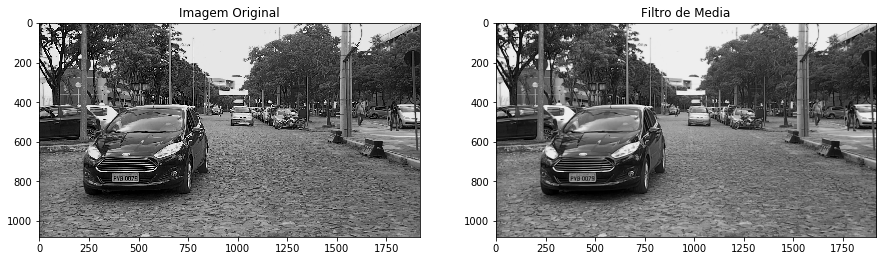

In [12]:
# Aplicacao de filtro de Suavizacao de Média

plt.figure(figsize=(15,10))

im = img[0] #imagem original
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.title('Imagem Original')

# Blur - Filtro de media
plt.subplot(1,2,2)
im = cv2.blur(im,(5,5)) 
plt.imshow(im,cmap='gray')
plt.title('Filtro de Media')

Na função *cv2.blur()* o valor (5,5) representa o tamnho da máscara utilizada, isto é, o número de vizinhos utilizados para o cálculo da média. Quanto maior esse valor, maior será o efeito de borramento na imagem. 

**Desafio:** *Para melhor visualizar o efeito de borramento recorte a imagem e exiba uma porção dela. Para isso você pode utilizar as técnicas de seleção de elementos vistas no [Notebook 1](Notebook1-IntroducaoPython.ipynb), uma vez que as imagens são matrizes de dimensões positivas cuja origem se localiza no canto superior esquerdo*

Text(0.5, 1.0, 'Filtro de Mediana')

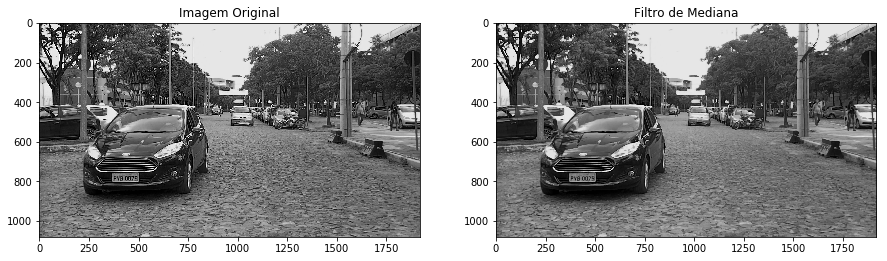

In [13]:
# Aplicacao de filtro de Suavizacao de Mediana

plt.figure(figsize=(15,10))

im = img[0] #imagem original
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.title('Imagem Original')

# Blur - Filtro de mediana
im = cv2.medianBlur(im,5) # 5 representa o tamanho da máscara
plt.subplot(1,2,2)
plt.imshow(im,cmap='gray')
plt.title('Filtro de Mediana')

Text(0.5, 1.0, 'Filtro Gaussiano')

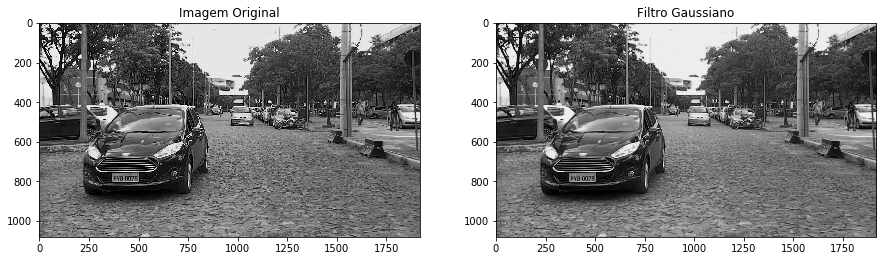

In [14]:
# Aplicacao de filtro de Suavizacao Gaussiano

plt.figure(figsize=(15,10))

im = img[0] #imagem original
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.title('Imagem Original')

# Blur - Filtro gaussiano
plt.subplot(1,2,2)
im = cv2.GaussianBlur(im,(5,5),0) # (5,5) representa o tamanho da máscara 
                                  #  e 0 o desvio padrão nas direcoes x e y
                                  #  para construcao da mascara de distribuicao gaussiana
plt.imshow(im,cmap='gray')
plt.title('Filtro Gaussiano')

Text(0.5, 1.0, 'Filtro Bilateral')

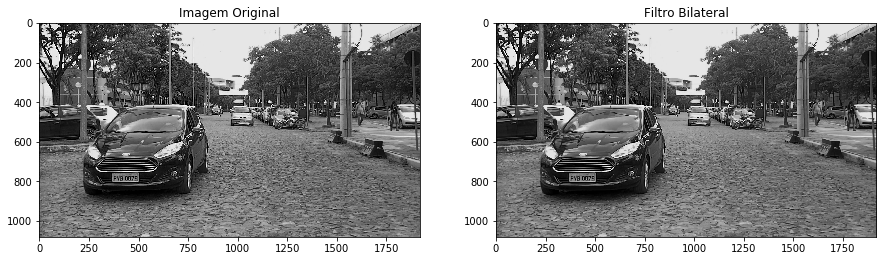

In [15]:
# Aplicacao de filtro de Suavizacao Bilateral

plt.figure(figsize=(15,10))

im = img[0] #imagem original
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.title('Imagem Original')

# Blur - Filtro Bilateral
plt.subplot(1,2,2)
im = cv2.bilateralFilter(im,5,20,20) # 5 representa o tamanho da máscara 
                                     # e os 20 são váriaveis sigmas que indicam
                                     # o quando os pixels vizinhos irão influenciar
                                     # em termos da cor e da distancia espacial
                                     # respectivamente
plt.imshow(im,cmap='gray')
plt.title('Filtro Bilateral')

Devido as distintas iluminações presentes na base de dados por conta do ambiente externo e sem controle, além dos ruídos pode-se considerar formas de homogenizar a iluminação. Para entender o comportamento do nível de brilho (intensidade dos pixels) podemos plotar o histograma da imagem. E para balancear a iluminação uma boa tentativa é realizar a equalização dos histograma.

Histograma é a representação gráfica dos níveis de brilho de uma imagem. É definido
como um conjunto de números indicando o total de pixels na imagem que apresentam um
determinado nível de cinza. Os histogramas são normalmente representados por barras que
fornecem para cada nível de cinza (eixo x) o número correspondente de pixels com esse
valor na imagem (eixo y). A visualização do histograma permite obter uma indicação tanto
da qualidade quanto do nível de contraste e brilho médio de uma imagem (GONZALEZ;
WOODS, 2006).

A equalização do histograma consiste em obter uma imagem com distribuição de níveis de cinza uniformes,
isto é, esses níveis irão aparecer na imagem aproximadamente com a mesma frequência.
Ela realça as diferenças sutis entre níveis de cinza próximos e leva a um aumento no nível
de detalhes perceptíveis. (Pedrini e Schwartz, 2008)

Existem diferentes formas de plotar o histograma da imagem, nesse guia iremos utilizar a função *np.histogram()* do Numpy para criar e plotar o histograma e a função de equalização automática de histograma *cv2.equalizeHist()* para equalizar. 

Além de histograma pode-se utilizar funções lineares (soma e mutiplicação por escalar) e tabela de cores para modificar os calores de intensidade de pixel de uma imagem, realizando as chamadas operações de realce e alongamento de contraste (*contrast stretching*). Diferentemente dos filtros espaciais, esse tipo de operação não leva em consideração os valores dos pixels vizinhos, apenas modificam o valor de cada pixel de forma independente, nesse caso costuma-se chamar de opeações pontuais ou ponto-a-ponto.

Text(0.5, 1.0, 'Histograma Original')

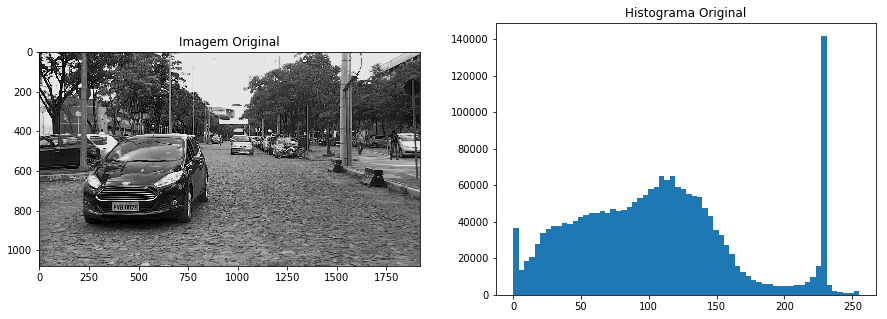

In [17]:
# Plotagem do histograma

plt.figure(figsize=(15,5))

im = img[0] #imagem original
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.title('Imagem Original')

#Histograma
nbins = 64
h, bin_edges = np.histogram(im.ravel(), nbins,(0,255)) #O vetor do histograma fica armazenado em h
w=256./nbins
bin_centers = bin_edges[1:]-(w/2)
plt.subplot(1,2,2)
plt.bar(bin_centers, h, width=w)
plt.title('Histograma Original')

Text(0.5, 1.0, 'Histograma Equalizado')

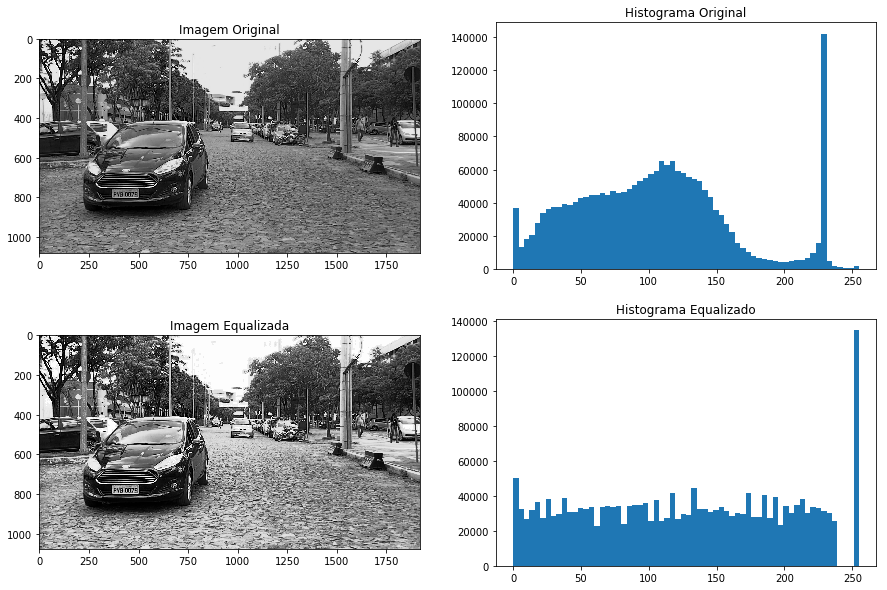

In [19]:
plt.figure(figsize=(15,10))

# Original
plt.subplot(2,2,1)
plt.imshow(im,cmap='gray')
plt.title('Imagem Original')

plt.subplot(2,2,2)
plt.bar(bin_centers, h, width=w)
plt.title('Histograma Original')


# Equalização
plt.subplot(2,2,3)
im_eq = cv2.equalizeHist(im) #funcao para equalizacao automatica de histograma
plt.imshow(im_eq,cmap='gray')
plt.title('Imagem Equalizada')

#Histograma
h_eq, bin_edges = np.histogram(im_eq.ravel(), nbins,(0,255))
bin_centers = bin_edges[1:]-(w/2)
plt.subplot(2,2,4)
plt.bar(bin_centers, h_eq, width=w)
plt.title('Histograma Equalizado')

Observe agora o efeito do filtro de média, e como ele aumenta o número de pixels com valores medianos.

Text(0.5, 1.0, 'Histograma da Media')

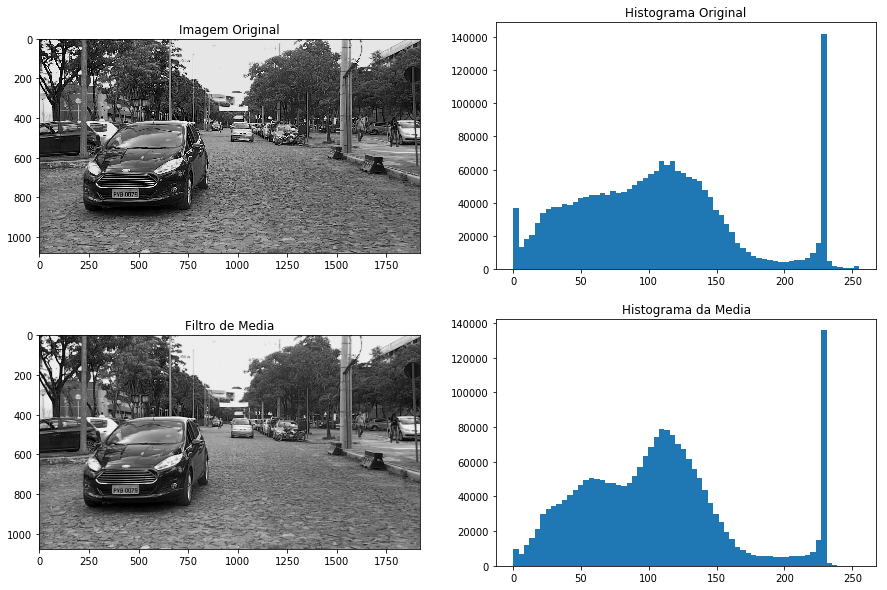

In [20]:
plt.figure(figsize=(15,10))

# Original
plt.subplot(2,2,1)
plt.imshow(im,cmap='gray')
plt.title('Imagem Original')

plt.subplot(2,2,2)
plt.bar(bin_centers, h, width=w)
plt.title('Histograma Original')

# Blur - Filtro de media
plt.subplot(2,2,3)
im_md = cv2.blur(im,(5,5)) 
plt.imshow(im_md,cmap='gray')
plt.title('Filtro de Media')

h_md, bin_edges = np.histogram(im_md.ravel(), nbins,(0,255))
bin_centers = bin_edges[1:]-(w/2)
plt.subplot(2,2,4)
plt.bar(bin_centers, h_md, width=w)
plt.title('Histograma da Media')

### Referências